In [5]:
#moutning
from google.colab import drive
drive.mount("/content/gdrive")


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Mounted at /content/gdrive


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
train_df = pd.read_csv('/content/gdrive/My Drive/ff/train.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/ff/test.csv')

In [11]:
train_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,-0.116599,0.102762,-0.037786,0.130477,-0.026229,0.026322,0.159966,-0.019575,0.009420,0.033291,0.036587,-0.078640,-0.125131,-0.193802,0.105005,...,-0.678618,-0.347657,-0.877995,0.178195,-0.312968,-0.615441,-0.693210,-0.692876,-0.674830,-0.726645,-0.885103,-0.693210,-0.874292,-0.719795,-0.087878,-0.889442,-0.046516,-0.253649,-0.565425,-0.779376,-0.792391,-0.772836,-0.811409,-0.871927,-0.779376,-0.935785,-0.771497,-0.284627,-0.898859,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,0.282243,0.293867,0.363594,0.343611,0.297818,0.471808,0.259607,0.126333,0.221983,0.371608,0.371581,0.386569,0.468959,0.437268,0.371363,0.306507,0.246593,0.243635,0.230067,0.257383,0.215001,0.208837,0.221432,0.

In [ ]:
train_df.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,0.029369,-0.076700,0.273480,0.186626,0.266917,0.000698,-0.674986,-0.788077,-0.473463,-0.501092,-0.166197,0.034015,0.195643,0.140158,-0.082077,-0.561607,0.426433,-0.078255,-0.056751,-0.094106,0.099141,-0.119821,0.293112,-0.425386,0.267986,-0.205315,0.142117,-0.211822,-0.251582,-0.283335,...,0.354983,-0.904762,-0.066650,-0.076714,-0.426588,-0.332753,-0.129727,-0.128549,-0.251258,-0.995117,-0.332753,-0.605727,-0.292601,0.577573,-0.897436,-0.376234,-0.170845,-0.551898,-0.681097,-0.723951,-0.647418,-0.799450,-0.925241,-0.681097,-0.951092,-0.599074,0.310836,-0.904762,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,0.029369,-0.031966,0.282174,0.202880,0.266917,-0.041310,-0.706359,-0.804546,-0.495789,-0.520057,-0.279863,0.026565,0.178138,0.293566,-0.051532,-0.361660,0.149854,0.206839,-0.154722,0.032725,-0.057240,0.034260,0.239835,-0.364480,0.121335,0.188717,-0.207505,-0.198555,-0.225866,-0.274504,...,0.361739,-0.904762,-0.193946,-0.151879,-0.509448,-0.357992,-0.187114,-0.210320,-0.131733,-0.916112,-0.357992,-0.649987,-0.427577,0.620646,-0.846154,-0.296176,0.019626,-0.277183,-0.682756,-0.771183,-0.727039,-0.779350,-0.761880,-0.682756,-0.957032,-0.670062,0.207930,-0.904762,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,-0.110405,0.055411,0.263175,0.202880,0.264670,0.008034,-0.693162,-0.844279,-0.271194,-0.488620,-0.250723,0.334376,0.173131,0.276040,0.152003,-0.376773,0.200784,0.063584,-0.017019,-0.004323,-0.023053,0.119962,0.080689,-0.420093,0.197763,-0.033780,0.016677,-0.226826,-0.184700,-0.198452,...,0.189903,-0.904762,0.007099,0.331457,0.083984,-0.351948,-0.032290,-0.193130,0.167388,-0.972099,-0.351948,-0.545002,-0.241789,0.5

In [ ]:
test_df.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",...,fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,-0.160309,-0.131106,0.354922,0.188452,0.362922,-0.197803,-0.744913,-0.854291,-0.721311,-0.567761,-0.368876,-0.277531,0.128951,0.250479,0.204483,-0.336571,0.119363,0.114556,0.069925,-0.225459,0.131274,0.013961,0.163305,-0.510918,0.525957,-0.467399,0.117754,-0.258908,-0.310537,-0.022682,...,0.214449,-0.904762,-0.110967,-0.157943,-0.583573,-0.477844,-0.571234,-0.515544,-0.605614,-0.861894,-0.477844,-0.862898,-0.498797,0.491522,-0.897436,0.093839,-0.410787,-0.711904,-0.601424,-0.618829,-0.558146,-0.698564,-0.770173,-0.601424,-0.917701,-0.536164,0.365783,-0.904762,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24,WALKING_UPSTAIRS
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,-0.035922,-0.131106,0.414650,-0.021580,0.218490,-0.186842,-0.755958,-0.794744,-0.708265,-0.549364,-0.353944,-0.386571,0.311991,0.277052,0.112971,-0.141648,-0.020623,0.124019,0.133963,-0.171622,0.087886,0.070093,0.085764,-0.416882,0.387530,-0.225698,-0.039828,-0.249325,-0.293864,0.031417,...,0.267662,-0.904762,0.125434,-0.223759,-0.689000,-0.491855,-0.556577,-0.525429,-0.664599,-0.682096,-0.491855,-0.861670,-0.639320,0.469640,-1.000000,0.092162,-0.449349,-0.795229,-0.566344,-0.592507,-0.530253,-0.662435,-0.947627,-0.566344,-0.904083,-0.534418,0.402907,-0.904762,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24,WALKING_UPSTAIRS
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,-0.035922,-0.172677,0.402517,-0.021580,0.218490,-0.232233,-0.772925,-0.818344,-0.745217,-0.536007,-0.527129,-0.560587,0.342902,0.411568,0.167789,-0.093074,-0.146011,0.400424,-0.123618,-0.117599,0.006040,0.170446,0.047362,-0.204792,0.077011,0.291691,-0.347075,-0.351080,-0.417738,0.118835,...,0.239540,-0.904762,0.111669,0.182278,-0.095859,-0.601283,-0.563327,-0.557262,-0.619462,-0.807723,-0.601283,-0.888421,-

In [ ]:
print("Size of Train data = {}".format(train_df.shape))
print("Size of Test data = {}".format(test_df.shape))

Size of Train data = (7352, 563)
Size of Test data = (2947, 563)


In [16]:
train_df.isna().sum()  

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [21]:
test_df.isna().sum() 

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [20]:
train_df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 563 columns):
 #   Column                                Dtype  
---  ------                                -----  
 0   tBodyAcc-mean()-X                     float64
 1   tBodyAcc-mean()-Y                     float64
 2   tBodyAcc-mean()-Z                     float64
 3   tBodyAcc-std()-X                      float64
 4   tBodyAcc-std()-Y                      float64
 5   tBodyAcc-std()-Z                      float64
 6   tBodyAcc-mad()-X                      float64
 7   tBodyAcc-mad()-Y                      float64
 8   tBodyAcc-mad()-Z                      float64
 9   tBodyAcc-max()-X                      float64
 10  tBodyAcc-max()-Y                      float64
 11  tBodyAcc-max()-Z                      float64
 12  tBodyAcc-min()-X                      float64
 13  tBodyAcc-min()-Y                      float64
 14  tBodyAcc-min()-Z                      float64
 15  tBodyAcc-sma()      

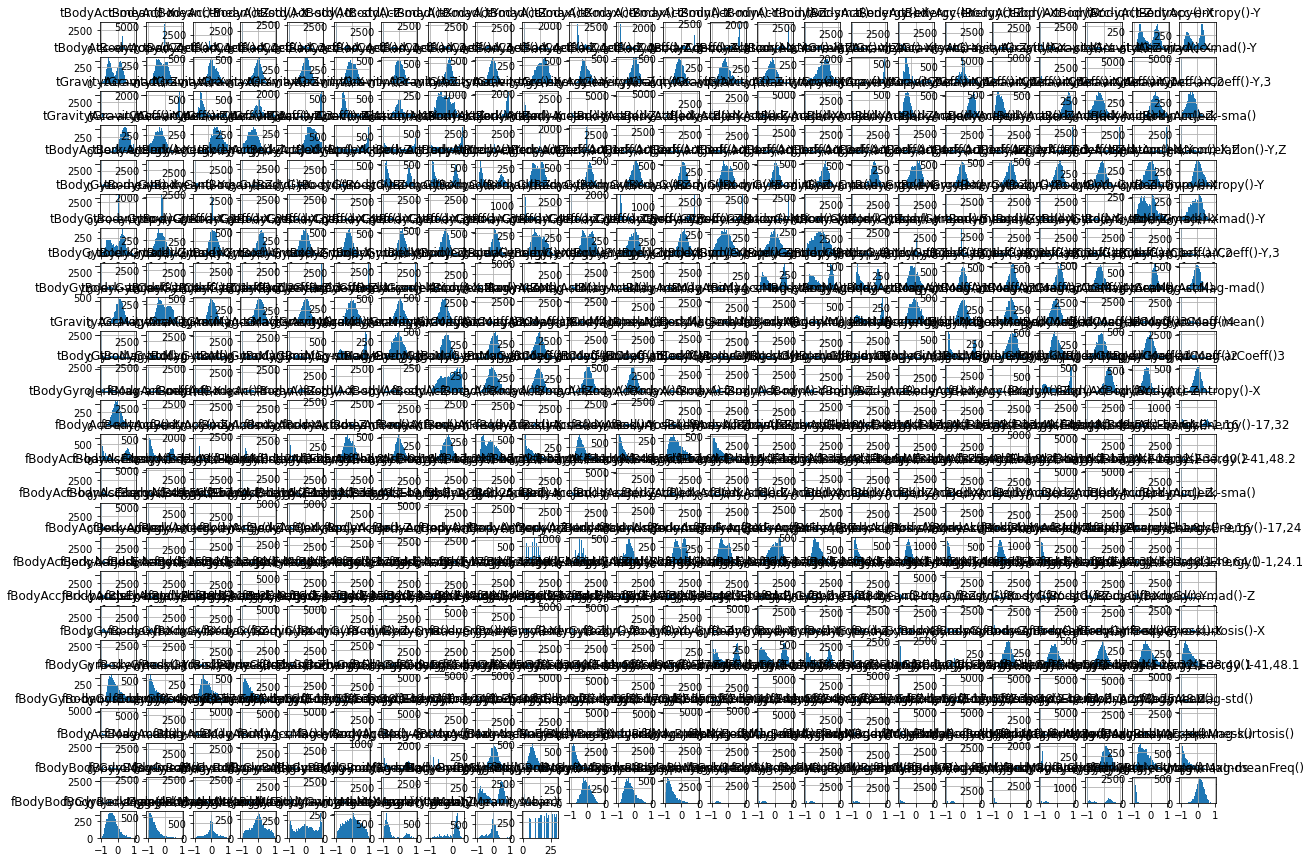

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
train_df.hist(bins=50, figsize=(20,15))
plt.show(5)

In [ ]:
X_train=train_df.iloc[:,:-2]
y_train=train_df.iloc[:,-1]

X_test=test_df.iloc[:,:-2]
y_test=test_df.iloc[:,-1]

In [ ]:
Category_count=np.array(y_train.value_counts())
activity=sorted(y_train.unique())

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

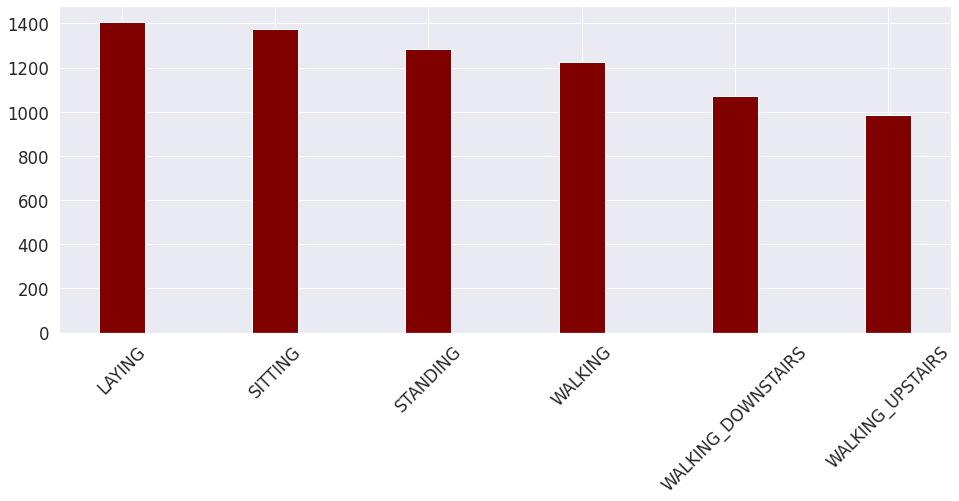

In [ ]:
plt.figure(figsize=(16,6))
#plt.pie(Category_count,labels=activity)
plt.bar(activity, Category_count, color ='maroon', width = 0.3, label='Activities')
plt.xticks(rotation=45)

# Data Cleaning

In [ ]:
# Checking for nan values
print("Number of NaN values in train data is "+str(train_df.isnull().sum().sum()))
print("Number of NaN values in test data is "+str(test_df.isnull().sum().sum()))

Number of NaN values in train data is 0
Number of NaN values in test data is 0


In [ ]:
# Checking for duplicate values
print("Number of duplicate values in train data is "+str(sum(train_df.duplicated())))
print("Number of duplicate values in test data is "+str(sum(test_df.duplicated())))

Number of duplicate values in train data is 0
Number of duplicate values in test data is 0


# Checking for imbalance in data

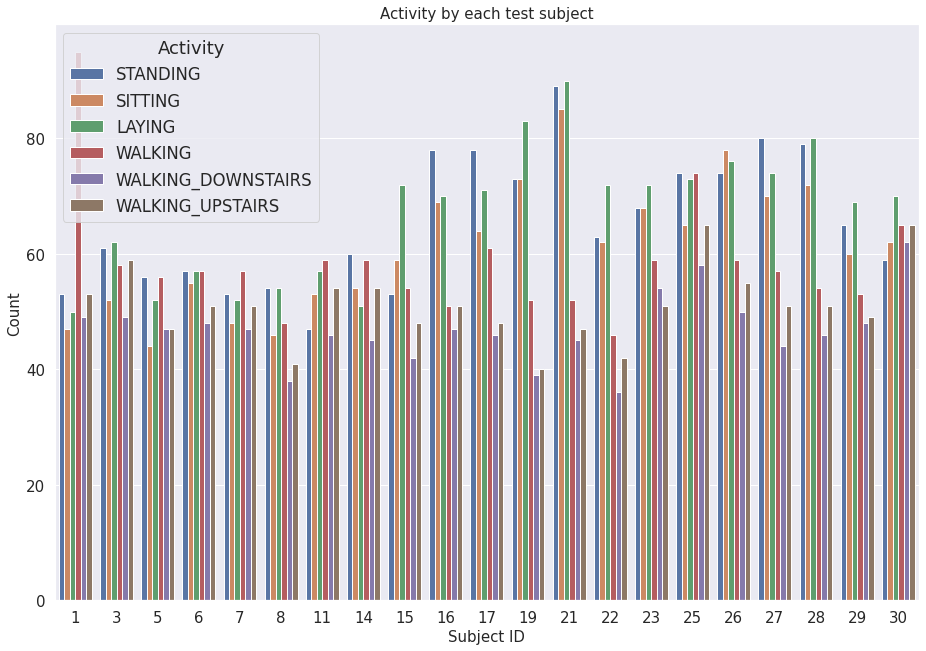

In [ ]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Activity by each test subject", fontsize = 15)
plt.tick_params(labelsize = 15)
sns.countplot(x = "subject", hue = "Activity", data = train_df)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Count", fontsize = 15)
plt.show()

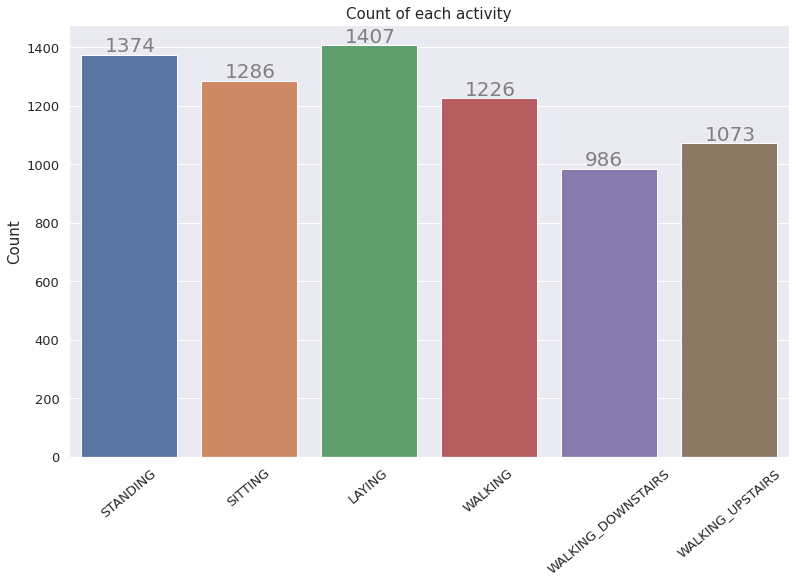

In [ ]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "Activity", data = train_df)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()

# Changing Feature Name

In [ ]:
columns = train_df.columns

In [ ]:
columns = columns.str.replace("[()]", '') 
columns = columns.str.replace("-", '')
columns = columns.str.replace(",", '')
#here, columns is of type pandas index. By writing "columns.str" we have changed its type to 
#pandas string. Pandas string has method called replace which we have used here.

train_df.columns = columns
test_df.columns = columns

In [ ]:
train_df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagkurtosis', 'angletBodyAccMeangravity',
       'angletBodyAccJerkMeangravityMean', 'angletBodyGyroMeangravityMean',
       'angletBodyGyroJerkMeangravityMean', 'angleXgravityMean',
       'angleYgravityMean', 'angleZgravityMean', 'subject', 'Activity'],
      dtype='object', length=563)

In [ ]:
train_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,-0.567378,-0.744413,0.852947,0.685845,0.814263,-0.965523,-0.999945,-0.999863,-0.994612,-0.994231,-0.987614,-0.943220,-0.407747,-0.679338,-0.602122,0.929294,-0.853011,0.359910,-0.058526,0.256892,-0.224848,0.264106,-0.095246,0.278851,-0.465085,0.491936,-0.190884,0.376314,0.435129,0.660790,...,-1.0,-0.936508,0.346989,-0.516080,-0.802760,-0.980135,-0.961309,-0.973653,-0.952264,-0.989498,-0.980135,-0.999240,-0.992656,-0.701291,-1.000000,-0.128989,0.586156,0.374605,-0.991990,-0.990697,-0.989941,-0.992448,-0.991048,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,-0.557851,-0.818409,0.849308,0.685845,0.822637,-0.981930,-0.999991,-0.999788,-0.998405,-0.999150,-0.977866,-0.948225,-0.714892,-0.500930,-0.570979,0.611627,-0.329549,0.284213,0.284595,0.115705,-0.090963,0.294310,-0.281211,0.085988,-0.022153,-0.016657,-0.220643,-0.013429,-0.072692,0.579382,...,-1.0,-0.841270,0.532061,-0.624871,-0.900160,-0.988296,-0.983322,-0.982659,-0.986321,-0.991829,-0.988296,-0.999811,-0.993979,-0.720683,-0.948718,-0.271958,-0.336310,-0.720015,-0.995854,-0.996399,-0.995442,-0.996866,-0.994440,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,-0.557851,-0.818409,0.843609,0.682401,0.839344,-0.983478,-0.999969,-0.999660,-0.999470,-0.997130,-0.964810,-0.974675,-0.592235,-0.485821,-0.570979,0.273025,-0.086309,0.337202,-0.164739,0.017150,-0.074507,0.342256,-0.332564,0.239281,-0.136204,0.173863,-0.299493,-0.124698,-0.181105,0.608900,...,-1.0,-0.904762,0.660795,-0.724697,-0.928539,-0.989255,-0.986028,-0.984274,-0.990979,-0.995703,-0.989255,-0.999854,-0.993238,-0.736521,-0.794872,-0.212728,-0.535352,-0.871914,-0.995031,-0.995127,-0.994640,-0.996060,-0.995866,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0

In [ ]:
test_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,tBodyAccmaxY,tBodyAccmaxZ,tBodyAccminX,tBodyAccminY,tBodyAccminZ,tBodyAccsma,tBodyAccenergyX,tBodyAccenergyY,tBodyAccenergyZ,tBodyAcciqrX,tBodyAcciqrY,tBodyAcciqrZ,tBodyAccentropyX,tBodyAccentropyY,tBodyAccentropyZ,tBodyAccarCoeffX1,tBodyAccarCoeffX2,tBodyAccarCoeffX3,tBodyAccarCoeffX4,tBodyAccarCoeffY1,tBodyAccarCoeffY2,tBodyAccarCoeffY3,tBodyAccarCoeffY4,tBodyAccarCoeffZ1,tBodyAccarCoeffZ2,tBodyAccarCoeffZ3,tBodyAccarCoeffZ4,tBodyAcccorrelationXY,tBodyAcccorrelationXZ,tBodyAcccorrelationYZ,...,fBodyBodyAccJerkMagentropy,fBodyBodyAccJerkMagmaxInds,fBodyBodyAccJerkMagmeanFreq,fBodyBodyAccJerkMagskewness,fBodyBodyAccJerkMagkurtosis,fBodyBodyGyroMagmean,fBodyBodyGyroMagstd,fBodyBodyGyroMagmad,fBodyBodyGyroMagmax,fBodyBodyGyroMagmin,fBodyBodyGyroMagsma,fBodyBodyGyroMagenergy,fBodyBodyGyroMagiqr,fBodyBodyGyroMagentropy,fBodyBodyGyroMagmaxInds,fBodyBodyGyroMagmeanFreq,fBodyBodyGyroMagskewness,fBodyBodyGyroMagkurtosis,fBodyBodyGyroJerkMagmean,fBodyBodyGyroJerkMagstd,fBodyBodyGyroJerkMagmad,fBodyBodyGyroJerkMagmax,fBodyBodyGyroJerkMagmin,fBodyBodyGyroJerkMagsma,fBodyBodyGyroJerkMagenergy,fBodyBodyGyroJerkMagiqr,fBodyBodyGyroJerkMagentropy,fBodyBodyGyroJerkMagmaxInds,fBodyBodyGyroJerkMagmeanFreq,fBodyBodyGyroJerkMagskewness,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,-0.554577,-0.466223,0.717208,0.635502,0.789497,-0.877764,-0.997766,-0.998414,-0.934345,-0.975669,-0.949824,-0.830478,-0.168084,-0.378996,0.246217,0.521204,-0.487793,0.482280,-0.045462,0.211955,-0.134894,0.130858,-0.014176,-0.105971,0.073544,-0.171516,0.040063,0.076989,-0.490546,-0.709003,...,-0.484619,-1.000000,-0.035356,-0.254248,-0.700326,-0.770610,-0.797113,-0.764485,-0.820188,-0.937959,-0.770610,-0.970958,-0.798387,0.179435,-1.000000,-0.047391,-0.467849,-0.761326,-0.890165,-0.907308,-0.895301,-0.917883,-0.909829,-0.890165,-0.994105,-0.898022,-0.234815,-1.000000,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,-0.554577,-0.806013,0.768031,0.683698,0.796706,-0.969097,-0.999580,-0.999646,-0.997720,-0.994006,-0.973637,-0.950720,-0.302437,-0.348243,-0.404785,0.507492,-0.156495,0.040674,0.272991,0.197566,-0.194556,0.411411,-0.340466,0.077555,-0.084024,0.035305,-0.010083,-0.104983,-0.429134,0.399177,...,-0.723642,-1.000000,-0.491213,-0.215404,-0.666004,-0.924461,-0.916774,-0.919383,-0.917983,-0.991121,-0.924461,-0.995727,-0.933127,-0.218860,-1.000000,-0.031474,-0.090655,-0.461801,-0.951977,-0.938212,-0.938008,-0.949922,-0.986902,-0.951977,-0.998272,-0.951255,-0.431053,-1.000000,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,-0.568512,-0.799116,0.848305,0.667864,0.822442,-0.976782,-0.999954,-0.999570,-0.998720,-0.993456,-0.974266,-0.964976,-0.617916,-0.695490,-0.536693,0.242147,-0.114997,0.032703,0.192385,-0.011945,-0.063363,0.470819,-0.507395,0.188536,-0.231575,0.632120,-0.550708,0.305653,-0.323848,0.279786,...,-0.898000,-1.000000,0.140729,-0.206062,-0.639809,-0.975209,-0.973998,-0.967097,-0.982849,-0.997663,-0.975209,-0.999504,-0.968260,-0.561266,-0.897436,-0.168805,-0.662317,-0.925364,-0.985689,-0.983273,-0.983422,-0.986857,-0.989609,-0.985689,-0.999831,-0.986148,-0.809976,-0.936508,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.9952

# Data Analysis

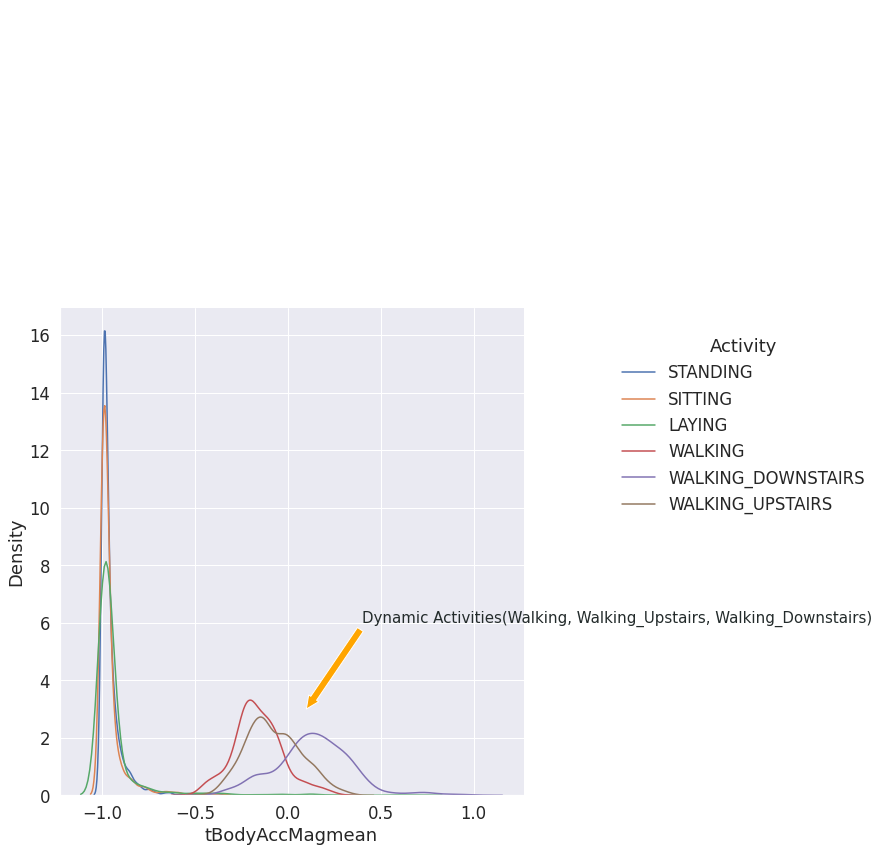

In [ ]:
facetgrid = sns.FacetGrid(data = train_df, hue = "Activity", size = 8)
facetgrid.map(sns.distplot, "tBodyAccMagmean", hist = False).add_legend()
plt.annotate('Static Activities(Sitting, Standing, Lying)', xy=(-0.97, 23), xytext=(-0.7, 27),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 15), size = 15, color = "#232b2b")
plt.annotate('Dynamic Activities(Walking, Walking_Upstairs, Walking_Downstairs)', xy=(0.1, 3), xytext=(0.4, 6),
            arrowprops=dict(facecolor='orange', width = 7, headlength = 13), size = 15, color = "#232b2b")
plt.show()

# Machine Learning Models

In [ ]:
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout
import warnings
warnings.simplefilter("ignore")

In [ ]:
x_train = train_df.drop(["subject", "Activity"], axis = 1)
y_train = train_df["Activity"]

x_test = test_df.drop(["subject", "Activity"], axis = 1)
y_test = test_df["Activity"]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

In [ ]:
table = pd.DataFrame(columns = ["Model", "Accuracy(%)"])
def keeping_record(model_name, accuracy):
    global table
    table = table.append(pd.DataFrame([[model_name, accuracy]], columns = ["Model", "Accuracy(%)"]))
    table.reset_index(drop = True, inplace = True)

In [ ]:
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
    sns.set(font_scale=1.5)
    labels = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LYING"]
    
    plt.figure(figsize=(8,4))
    sns.heatmap(confusionMatx, cmap = "OrRd", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

In [ ]:
def apply_model(cross_val, x_train, y_train, x_test, y_test, model_name):
    start = datetime.now()
    cross_val.fit(x_train, y_train)
    predicted_points = cross_val.predict(x_test)
    
    print("Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): {}\n".format(datetime.now() - start))
    accuracy = np.round(accuracy_score(y_test, predicted_points)*100, 2)
    
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print(str(accuracy)+"%\n")
    
    print('---------------------------')
    print('|      Best Estimator      |')
    print('---------------------------')
    print("{}\n".format(cross_val.best_estimator_))
    
    print('----------------------------------')
    print('|      Best Hyper-Parameters      |')
    print('----------------------------------')
    print(cross_val.best_params_)
    
    keeping_record(model_name, accuracy)
    
    print("\n\n")
    
    print_confusionMatrix(y_test, predicted_points)

In [ ]:
# Logistic Regression

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:01:55.807034

---------------------
|      Accuracy      |
---------------------
96.1%

---------------------------
|      Best Estimator      |
---------------------------
LogisticRegression(C=10, multi_class='ovr')

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'C': 10, 'penalty': 'l2'}





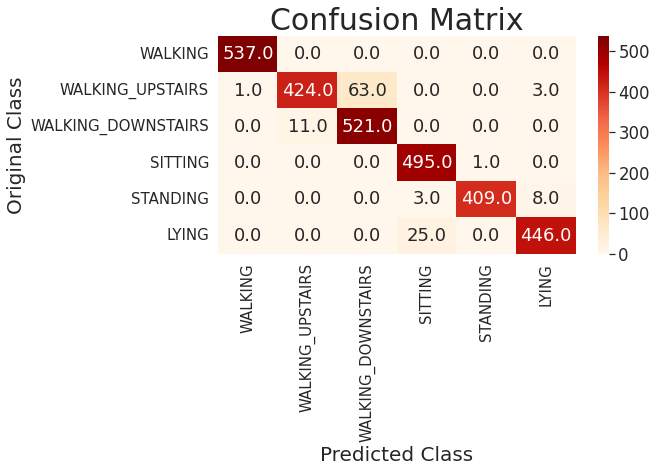

In [ ]:
parameters = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3], "penalty": ["l1", "l2"]}
clf = LogisticRegression(multi_class = "ovr")
cross_val = GridSearchCV(clf, parameters, cv=5)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Logistic Regression")

In [ ]:
# Linear SVM

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:02:07.346037

---------------------
|      Accuracy      |
---------------------
96.5%

---------------------------
|      Best Estimator      |
---------------------------
LinearSVC(C=1)

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'C': 1}





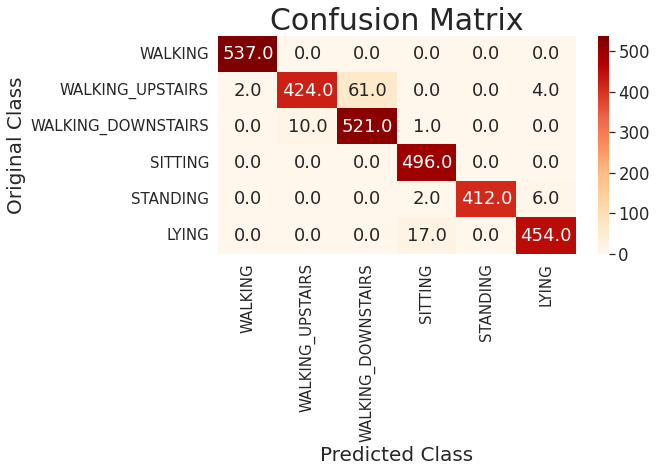

In [ ]:
parameters = {"C": [0.001, 0.01, 0.1, 1, 10**1, 10**2, 10**3]}
clf = LinearSVC()
cross_val = GridSearchCV(clf, parameters, cv=5)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Linear SVM")

In [ ]:
# Decision Trees

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:01:04.592386

---------------------
|      Accuracy      |
---------------------
86.97%

---------------------------
|      Best Estimator      |
---------------------------
DecisionTreeClassifier(max_depth=8)

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'max_depth': 8}





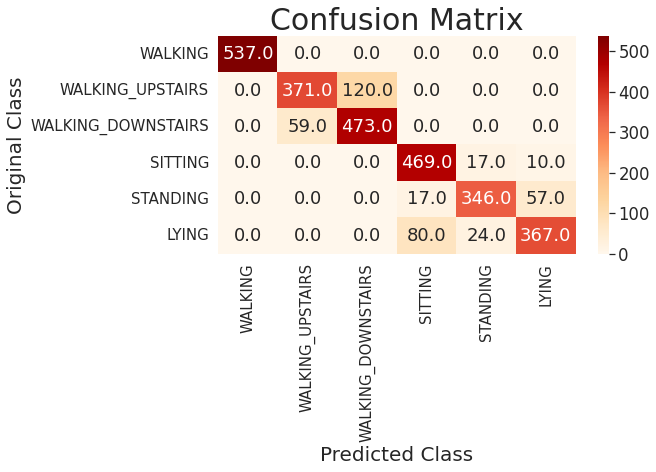

In [ ]:
parameters = {"max_depth": [2, 3, 4, 5, 6, 7, 8]}
clf = DecisionTreeClassifier()
cross_val = GridSearchCV(clf, parameters, cv=5)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Decision Trees")

In [ ]:
# Random Forest

Total time taken for tuning hyperparameter and making prediction by the model is (HH:MM:SS): 0:13:09.065470

---------------------
|      Accuracy      |
---------------------
92.77%

---------------------------
|      Best Estimator      |
---------------------------
RandomForestClassifier(n_estimators=400)

----------------------------------
|      Best Hyper-Parameters      |
----------------------------------
{'n_estimators': 400}





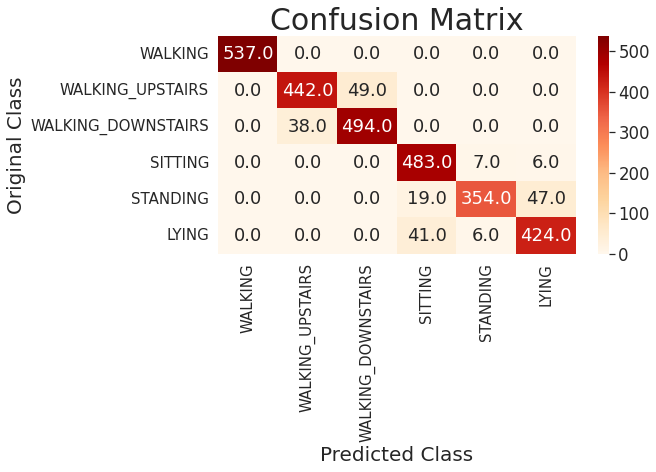

In [ ]:
parameters = {"n_estimators": [50, 100, 200, 400, 800]}
clf = RandomForestClassifier()
cross_val = GridSearchCV(clf, parameters, cv=5)
apply_model(cross_val, x_train, y_train, x_test, y_test, "Random Forest")

# Model Comparison

In [ ]:
table

,Model,Accuracy(%)
0,Logistic Regression,96.10
1,Linear SVM,96.50
2,Decision Trees,86.97
3,Random Forest,92.77


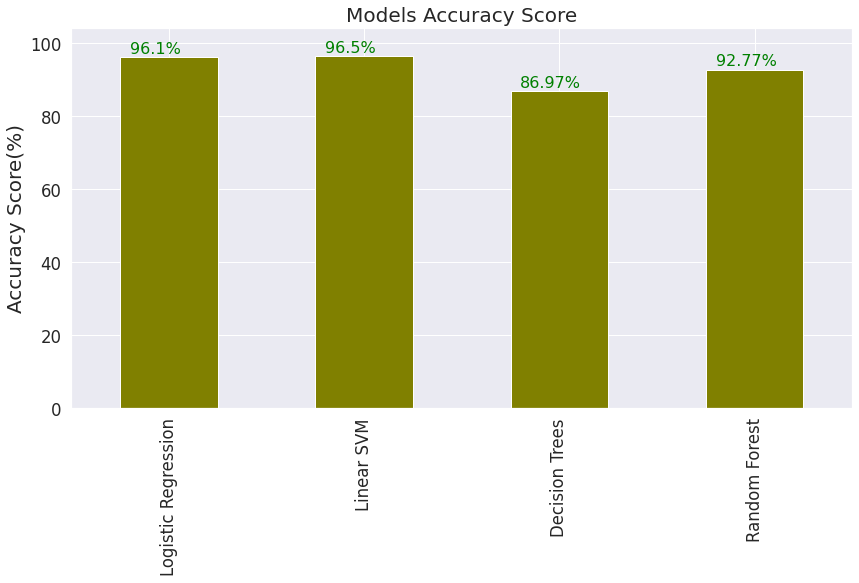

In [ ]:
ax = table.plot(x = "Model", y = "Accuracy(%)", kind = "bar", figsize = (14, 7), legend = False, color = "#808000")
plt.title("Models Accuracy Score", fontsize = 20) 
plt.xlabel("") 
plt.margins(x = 0, y = 0.08) 
plt.ylabel("Accuracy Score(%)", fontsize = 20) 
plt.grid(visible = True) 
for i in ax.patches: 
  ax.text(x = i.get_x()+0.05, y = i.get_height()+1, s = str(i.get_height())+"%", fontsize = 16, color = "#008000")

# Implementing Deep Neural Network (MLP)

In [ ]:

from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(alpha=5,hidden_layer_sizes=(300, 6), random_state=1,solver='adam')
sgd = MLPClassifier(alpha=5,hidden_layer_sizes=(300, 6), random_state=1, solver ='sgd',max_iter=300 )
clf.fit(x_train,y_train)
sgd.fit(x_train,y_train)

MLPClassifier(alpha=5, hidden_layer_sizes=(300, 6), max_iter=300,
              random_state=1, solver='sgd')

Training Accuracy in MLP: 0.9666757344940152
Testing Accuracy in MLP: 0.9311163895486936


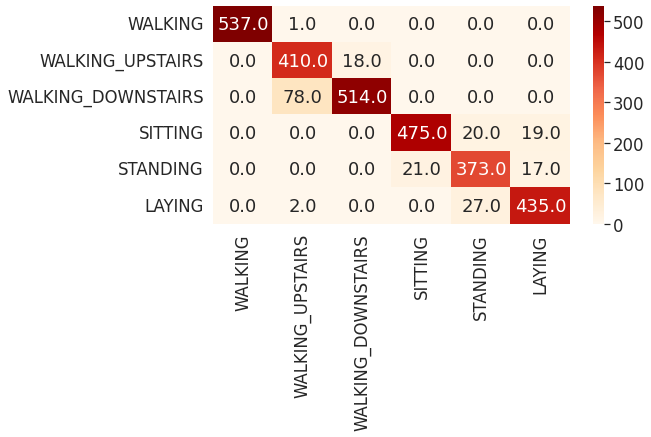

In [ ]:
pred = clf.predict(x_test)
predt = clf.predict(x_train)
TeAccuracy = accuracy_score(y_true = y_test, y_pred = pred)
TrAccuracy = accuracy_score(y_true = y_train, y_pred = predt)

print("Training Accuracy in MLP: {}".format(TrAccuracy))
print("Testing Accuracy in MLP: {}".format(TeAccuracy))

yy = list(map(str, pred))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy))
y_test1 = np.array(pd.Series(yy1))

array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
df_cm.columns = ["LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
df_cm.index = ["LAYING", "SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIR"]
#sn.set(font_scale=1)#for label size
plt.figure(figsize=(8,4))
#sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
sns.heatmap(df_cm, cmap = "OrRd", annot=True, fmt = ".1f", yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.show()











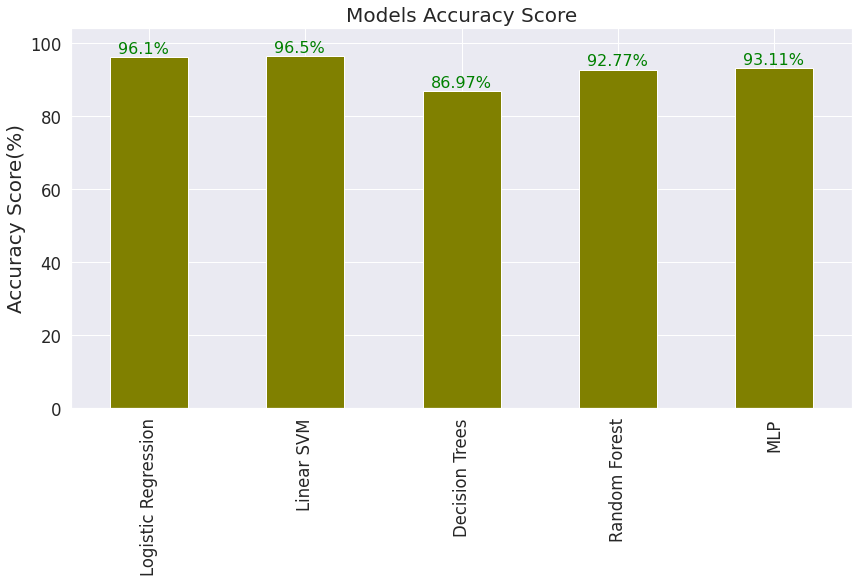

In [ ]:
## extra by miraj ##

keeping_record("MLP", round(TeAccuracy*100, 2))

ax = table.plot(x = "Model", y = "Accuracy(%)", kind = "bar", figsize = (14, 7), legend = False, color = "#808000")
plt.title("Models Accuracy Score", fontsize = 20) 
plt.xlabel("") 
plt.margins(x = 0, y = 0.08) 
plt.ylabel("Accuracy Score(%)", fontsize = 20) 
plt.grid(visible = True) 
for i in ax.patches: 
  ax.text(x = i.get_x()+0.05, y = i.get_height()+1, s = str(i.get_height())+"%", fontsize = 16, color = "#008000")